In [14]:
import pandas as pd
from pathlib import Path
from pandas import DataFrame
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'lines.linewidth': 1, 'axes.labelsize': 12, 'axes.titlesize': 12})
sns.set_theme(style='whitegrid')
sns.set_context("notebook", rc={"lines.linewidth": 1.0})

palette = ["#e36414", "#588157", "#669bbc", "#ba181b"]
# Make Matplotlib plots appear inline
%matplotlib inline

In [15]:
results = Path("./results")

def plot_unity(xdata, ydata, **kwargs):
    mn = min(xdata.min(), ydata.min())
    mx = max(xdata.max(), ydata.max())
    points = np.linspace(mn, mx, 100)
    plt.gca().plot(points, points, color='k', marker=None, linestyle='--', linewidth=1.0)

In [17]:
# sylvan_overall_regression_runtime = pd.read_csv(results / 'sylvan_overall_regression_runtime.csv')
# sylvan_workers_regression_runtime = pd.read_csv(results / 'sylvan_workers_regression_runtime.csv')
sylvan_regression_quality_max_growth = pd.read_csv(results / 'sylvan_regression_quality_max_growth.csv')
sylvan_regression_quality_nodes_threshold = pd.read_csv(results / 'sylvan_regression_quality_nodes_threshold.csv')
columns={
    'time': 'Runtime [s]', 
    'max_growth': 'Max growth [%]', 
    'nodes_threshold': 'Nodes threshold',
    'to_size': 'Resulting number of nodes',
}
sylvan_regression_quality_max_growth.rename(columns=columns, inplace=True)
sylvan_regression_quality_nodes_threshold.rename(columns=columns, inplace=True)
sylvan_regression_quality_max_growth['Max growth [%]'] = sylvan_regression_quality_max_growth['Max growth [%]'].apply(lambda x: (x*100)-100)

sylvan_regression_quality_max_growth['model'] = sylvan_regression_quality_max_growth['model'].apply(lambda x: x.replace("_max_growth", ""))
sylvan_regression_quality_nodes_threshold['model'] = sylvan_regression_quality_nodes_threshold['model'].apply(lambda x: x.replace("_nodes_threshold", ""))


In [18]:
sylvan_regression_quality_max_growth.head()

,from_size,Resulting number of nodes,Runtime [s],workers,Nodes threshold,Max growth [%],max_var,max_swap,reordering_trigger,model
0,39333,4942,0.338544,4,1,20.0,2000,10000,m,mult_bool_matrix_2_3_4
1,9534,1708,0.081913,4,1,15.0,2000,10000,m,mult_bool_matrix_2_3_3
2,38133,4168,0.040095,4,1,0.0,2000,10000,m,add10y
3,39333,6171,0.100357,4,1,0.0,2000,10000,m,mult_bool_matrix_2_3_4
4,39333,4942,0.372232,4,1,25.0,2000,10000,m,mult_bool_matrix_2_3_4


In [19]:
sylvan_regression_quality_nodes_threshold.head()

,from_size,Resulting number of nodes,Runtime [s],workers,Nodes threshold,Max growth [%],max_var,max_swap,reordering_trigger,model
0,9534,7278,0.032328,4,256,1.2,2000,10000,m,mult_bool_matrix_2_3_3
1,169619,2219,0.444955,4,1,1.2,2000,10000,m,add12y
2,38133,1559,0.112915,4,128,1.2,2000,10000,m,add10y
3,38133,1559,0.112598,4,128,1.2,2000,10000,m,add10y
4,169619,2332,0.354062,4,512,1.2,2000,10000,m,add12y


<Axes: xlabel='Nodes threshold', ylabel='Resulting number of nodes'>

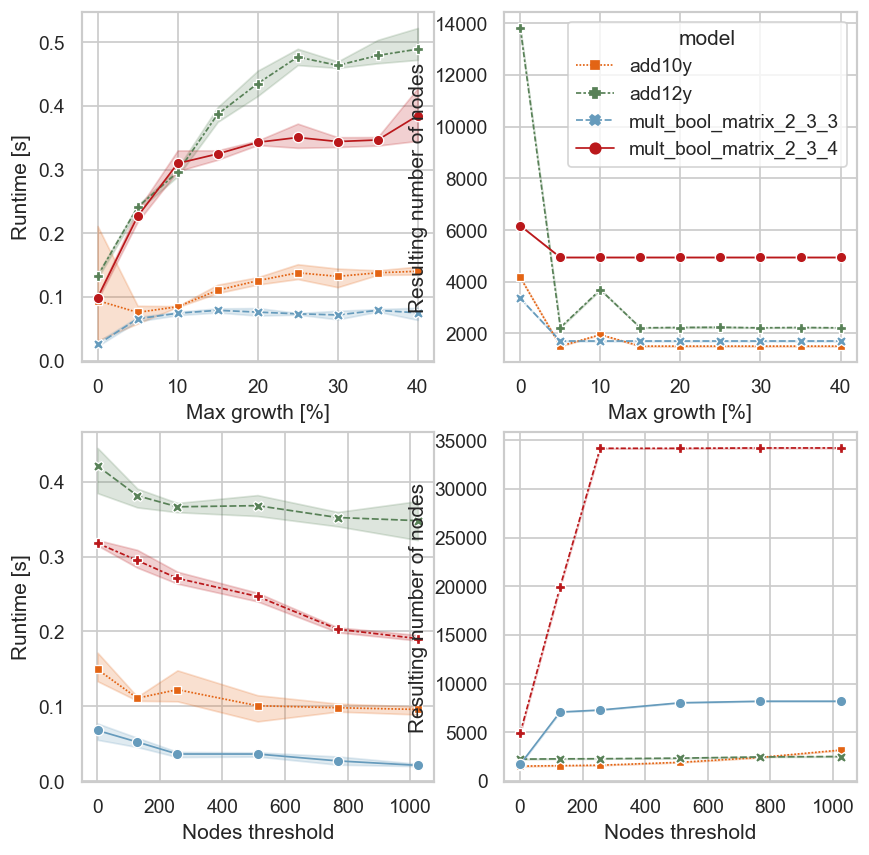

In [20]:
matplotlib.use("TkAgg")
%matplotlib inline
fig, axes = plt.subplots(2, 2, figsize=(8, 8), dpi=125)

hue_order=[f"add10y", f"add12y", f"mult_bool_matrix_2_3_3", f"mult_bool_matrix_2_3_4"]


df = sylvan_regression_quality_max_growth
type="Max growth"
type_label = type.lower().replace(" ", "_")
sns.lineplot(ax=axes[0, 0],data=df,x=f"{type} [%]", y="Runtime [s]",hue="model",hue_order=hue_order, style="model",palette=palette, legend=False, markers=True, dashes=True)
sns.lineplot(ax=axes[0, 1],data=df,x=f"{type} [%]", y="Resulting number of nodes",hue="model",hue_order=hue_order, style="model",palette=palette, legend="auto", markers=True, dashes=True)

df = sylvan_regression_quality_nodes_threshold
type="Nodes threshold"
type_label = type.lower().replace(" ", "_")
sns.lineplot(ax=axes[1, 0],data=df,x=type, y="Runtime [s]",hue="model",hue_order=hue_order, style="model",palette=palette, legend=False, markers=True, dashes=True)
sns.lineplot(ax=axes[1, 1],data=df,x=type , y="Resulting number of nodes",hue="model",hue_order=hue_order, style="model",palette=palette, legend=False,markers=True, dashes=True)

<Axes: xlabel='workers', ylabel='median'>

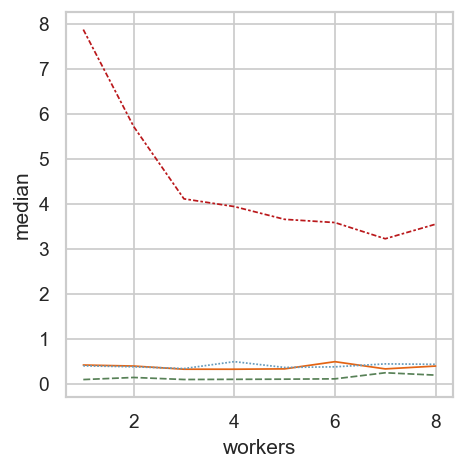

In [21]:
matplotlib.use("TkAgg")
%matplotlib inline

fig, axes = plt.subplots(1, 1, figsize=(4, 4), dpi=125)
df = sylvan_workers_regression_runtime
type = "workers"

sns.lineplot(data=df,x=type, y="median",hue="model", style="model",palette=palette, legend=False)